https://www.kaggle.com/c/data-science-london-scikit-learn

# Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.options.display.max_columns= 45
pd.options.display.max_rows = 1000

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Data

In [6]:
data = pd.read_csv('train.csv', header=None)
train_label = pd.read_csv('trainLabels.csv', header=None)
data['label'] = train_label[0]

In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,-0.016250,-0.038010,-1.985616,0.012374,-0.029229,-0.039307,-0.004091,-0.032836,0.428313,0.043427,0.073461,-0.005140,0.912288,0.902301,-0.023110,0.047473,-0.041117,0.012985,-0.395782,0.123921,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451,0.51000
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,1.026325,0.985889,4.528096,0.995652,2.164547,1.002481,0.970401,1.000130,2.176020,0.987689,0.967282,0.980319,2.178778,4.241903,1.019566,0.995752,0.998182,1.030610,2.296818,2.410453,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439,0.50015
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,-3.304074,-3.157436,-14.706080,-3.002151,-6.790633,-2.914729,-3.464048,-2.944093,-8.258306,-3.423875,-4.251382,-2.822644,-6.337522,-16.156070,-3.218446,-2.820792,-3.023811,-3.054384,-8.034421,-7.105723,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,-0.713704,-0.730293,-5.094964,-0.694081,-1.441443,-0.757619,-0.668335,-0.727001,-0.983595,-0.594638,-0.588171,-0.698036,-0.542526,-1.822188,-0.720837,-0.617001,-0.668062,-0.696411,-1.936374,-1.562374,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041,0.00000
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,0.019479,-0.075950,-2.103532,-0.005946,-0.033219,-0.019046,0.008360,-0.011366,0.488217,0.082688,0.094307,-0.004404,1.050071,0.970403,-0.012183,0.014636,-0.017535,0.039219,-0.489296,-0.040604,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944,1.00000
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,0.709416,0.644553,1.186164,0.664921,1.492611,0.678748,0.674583,0.588732,1.915022,0.711525,0.727896,0.673427,2.367748,3.825862,0.671318,0.731892,0.642797,0.706336,1.044188,1.614308,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,3.409653,3.253032,12.186445,3.737423,6.959736,3.100935,2.805197,3.291544,7.074432,3.343812,2.938033,3.053262,8.096838,14.373681,2.981582,3.662800,3.293911,3.069885,7.413173,8.812739,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


# EDA and Visualization

In [8]:
@interact
def show_data(column=data.columns, l=(-20, 20), u=(-20,20)):
    return data.loc[(data[column] <= u) & (data[column] >= l)]

interactive(children=(Dropdown(description='column', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [9]:
@interact
def correlations_and_scatter_plot(column1=list(data.select_dtypes('number').columns),
                column2=list(data.select_dtypes('number').columns),
                                 label=True):
    print(f'Correlation: {data[column1].corr(data[column2])}')
    if label:
        data.plot.scatter(x=column1, y=column2, figsize=(10,6), c='label', colormap='RdBu')
    else:
        data.plot.scatter(x=column1, y=column2, figsize=(10,6))

interactive(children=(Dropdown(description='column1', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [10]:
@interact
def histogram(column=list(data.select_dtypes('number').columns), bins=(20, 260,20)):
    data[column].plot.hist(bins=bins, figsize=(10,6))

interactive(children=(Dropdown(description='column', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [11]:
def summary(series):
    minimum = series.min()
    maximum = series.max()
    q1 = series.quantile(.25)
    q2 = series.quantile(.5)
    q3 = series.quantile(.75)
    iqr = q3 - q1
    ut = q3 + 1.5*iqr
    lt = q1 - 1.5*iqr
    return [minimum, lt, q1, q2, q3, ut, maximum]
@interact
def boxplot(column=list(data.select_dtypes('number').columns)):
    description = pd.DataFrame()
    description['All'] = summary(data[column])
    description['0'] = summary(data[data['label'] == 0][column])
    description['1'] = summary(data[data['label'] == 1][column])
    description = description.transpose()
    description.columns = ['Minimum', 'Lower Thr.', 'Q1', 'Median', 'Q3', 'Upper Thr.', 'Maximum']
    print(description.to_string())
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
    data.boxplot(column=[column], by='label', figsize=(10,8), ax=ax[0])
    data.boxplot(column=[column], figsize=(5,8), ax=ax[1])

interactive(children=(Dropdown(description='column', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

# Preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
scaler.fit(data.drop(['label'], axis=1))
scaled_data = scaler.transform(data.drop(['label'], axis=1))

# Machine Learning

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

In [16]:
models_dict = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SGDClassifier': SGDClassifier(),
}
@interact
def machineLearning(model= ['LogisticRegression', 'GaussianNB', 'MultinomialNB', 'BernoulliNB', 
                            'DecisionTreeClassifier', 'SGDClassifier'],
                   test_size=(10, 40)):
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, train_label[0], test_size=test_size/100, random_state=101)
    model = models_dict[model]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred, y_test))
    print(classification_report(y_pred, y_test))

interactive(children=(Dropdown(description='model', options=('LogisticRegression', 'GaussianNB', 'MultinomialN…

[Text(0, 0, 'TP'), Text(0, 0, 'FP'), Text(0, 0, 'FN'), Text(0, 0, 'TN')]

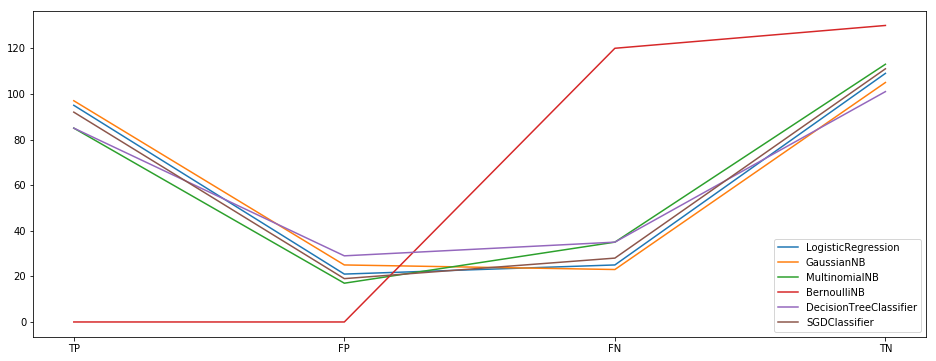

In [17]:
confusionmatrix = pd.DataFrame()
for algoname, algo in models_dict.items():
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, train_label[0], test_size=0.25, random_state=101)
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    metric = []
    for i in range(2):
        for j in range(2):
            metric.append(cm[i][j])
    confusionmatrix[algoname] = metric

confusionmatrix['Metric'] = ['TP', 'FP', 'FN', 'TN']

# confusionmatrix

ax = confusionmatrix.plot(figsize=(16,6))
ax.set_xticks(confusionmatrix.index)
ax.set_xticklabels(confusionmatrix.Metric)

# Deeplearning

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [19]:
es = EarlyStopping(monitor='loss', mode='min', verbose=3)
filepath = "ann.h5"
ckpt = ModelCheckpoint(filepath, monitor='loss', verbose=3, save_best_only=True, mode='min')

In [20]:
def build_network():
    model = Sequential()
    model.add(Dense(160,input_dim=40, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(320, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(365, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(125, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [21]:
model = build_network()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 160)               6560      
_________________________________________________________________
dropout_1 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 320)               51520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 365)               117165    
_________________________________________________________________
dropout_3 (Dropout)  

In [22]:
model.fit(scaled_data, train_label[0], validation_split=0.3, epochs=25, callbacks=[es, ckpt])

Instructions for updating:
Use tf.cast instead.
Train on 700 samples, validate on 300 samples
Epoch 1/25
700/700 [==============================] - 3s 4ms/step - loss: 0.6855 - acc: 0.5371 - val_loss: 0.6693 - val_acc: 0.5267

Epoch 00001: loss improved from inf to 0.68550, saving model to ann.h5
Epoch 2/25
700/700 [==============================] - 0s 422us/step - loss: 0.6356 - acc: 0.6443 - val_loss: 0.5841 - val_acc: 0.7000

Epoch 00002: loss improved from 0.68550 to 0.63558, saving model to ann.h5
Epoch 3/25
700/700 [==============================] - 0s 393us/step - loss: 0.5564 - acc: 0.7129 - val_loss: 0.5796 - val_acc: 0.7200

Epoch 00003: loss improved from 0.63558 to 0.55642, saving model to ann.h5
Epoch 4/25
700/700 [==============================] - 0s 388us/step - loss: 0.4921 - acc: 0.7771 - val_loss: 0.4606 - val_acc: 0.8100

Epoch 00004: loss improved from 0.55642 to 0.49211, saving model to ann.h5
Epoch 5/25
700/700 [==============================] - 0s 383us/step - lo

# Predictions

In [23]:
test_data = pd.read_csv('test.csv', header=None)

In [24]:
test_data.shape

(9000, 40)

In [25]:
scaled_test_data = scaler.transform(test_data)

## ANN

In [26]:
preds = model.predict_classes(scaled_test_data)

In [27]:
ann_predictions = pd.DataFrame()
ann_predictions['ID'] = np.arange(1, 9001, 1)
ann_predictions['Solution'] = preds.flatten()
ann_predictions.to_csv('predictions_ANN.csv', index=False)

## ML Models

In [30]:
@interact
def machineLearning(algo= ['LogisticRegression', 'GaussianNB', 'MultinomialNB', 'BernoulliNB', 
                            'DecisionTreeClassifier', 'SGDClassifier']):
    model = models_dict[algo]
    model.fit(scaled_data, train_label[0])
    
    predictions = pd.DataFrame()
    predictions['ID'] = np.arange(1, 9001, 1)
    predictions['Solution'] = model.predict(scaled_test_data)
    predictions.to_csv(f'predictions_{algo}.csv', index=False)

interactive(children=(Dropdown(description='algo', options=('LogisticRegression', 'GaussianNB', 'MultinomialNB…

# Results
* ANN 0.80961
* LogisticRegression 0.81259
* GaussianNB 0.81445
* MultinomialNB 0.77645
* BernoulliNB 0.49813
* DecisionTreeClassifier 0.78874
* SGDClassifier 0.79508